# Off-Facebook Activity Report
## Mason Faust

The main thing I am going to be analying in this report is what events outside of facebook are being recorded the most with this set of sample data. I am mainly going to be focusing on the 10 most recent companies that have had an event triggered by this user. My hypothisis is that there is going to be a direct correlation between the amount of interaction that happen on a companies app or website and the amount of advertisements the user gets on facebook about that app or website.

In [89]:
import json
from matplotlib import pyplot as plt
import datetime as dt
import pandas as pd

In [90]:
with open(r'C:\Users\mason\Desktop\facebook-davidsilva100046_toshare\facebook-davidsilva100046_toshare\ads_and_businesses\your_off-facebook_activity.json') as ofa:
    act = json.load(ofa)
print(act.keys())

dict_keys(['off_facebook_activity'])


In [91]:
type(act['off_facebook_activity'])

list

In [92]:
act['off_facebook_activity'][0]

{'name': 'U.S. Bank - Inspired by customers',
 'events': [{'id': 1591992844216198,
   'type': 'ACTIVATE_APP',
   'timestamp': 1594274368},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1594239280},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1594156238},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1594066670},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593919348},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593652182},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593651360},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593273365},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593127728},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593100373},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1593095964},
  {'id': 1591992844216198, 'type': 'ACTIVATE_APP', 'timestamp': 1592933608},
  {'id': 15919

In [93]:
type(act['off_facebook_activity'][0])

dict

In [94]:
act['off_facebook_activity'][0].keys()

dict_keys(['name', 'events'])

In [95]:
act['off_facebook_activity'][0]['events'][0]['type'] == 'ACTIVATE_APP'

True

## The Data

The data being used in this report is a json file that the user has requested from facebook.com reguarding the information gathered from their account while usings apps and websites outside of facebook. This file is titled "your off-facebook activity" and is organised as a list of dictionaries, by the most recent activity at the top and least recent activity at the bottom. Each dictonary has a name key and an events key. The name key lists the name of the outside source, and the events key shows every event the user had had with that source, listing the event ID, the type of event, and the timestamp for each one. I trust this data becasue it was given by request from facebook themselves and I have no concerns using this data.

In [96]:
apps = []
events = []
actapp = []
custom = []
search = []
viewc = []
ad = []
view = []

for i in act['off_facebook_activity']:
    apps.append(i['name'])
    events.append((len(i['events'])))
    actapp.append(len([x for x in i['events'] if x['type'] == 'ACTIVATE_APP']))
    custom.append(len([x for x in i['events'] if x['type'] == 'CUSTOM']))
    search.append(len([x for x in i['events'] if x['type'] == 'SEARCH']))
    viewc.append(len([x for x in i['events'] if x['type'] == 'VIEW_CONTENT']))
    ad.append(len([x for x in i['events'] if x['type'] == 'AD_REQUEST']))
    view.append(len([x for x in i['events'] if x['type'] == 'PAGE_VIEW']))

In [97]:
appbyevent = pd.DataFrame(columns = ('App', 'Event Count', 'Activate App', 'Custom', 'Search', 'View Content', 'Ad Request', 'Page Views'))
appbyevent['App'] = apps
appbyevent['Event Count'] = events
appbyevent['Activate App'] = actapp
appbyevent['Custom'] = custom
appbyevent['Search'] = search
appbyevent['View Content'] = viewc
appbyevent['Ad Request'] = ad
appbyevent['Page Views'] = view
appbyevent[0:10]

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
0,U.S. Bank - Inspired by customers,18,18,0,0,0,0,0
1,"Egg, Inc.",165,109,0,0,0,35,0
2,AP News,465,133,325,0,0,7,0
3,TikTok - Make Your Day,371,99,267,5,0,0,0
4,uoregon.edu,1,0,0,0,0,0,1
5,kent.edu,226,0,0,0,102,0,124
6,etsy.com,6,0,0,0,2,0,3
7,wayfair.com,10,0,3,0,4,0,3
8,eBay Business Manager,2,0,0,0,1,0,1
9,norlanglass.com,1,0,0,0,1,0,0


## Data Preperation

With the sections of code above, I have created a list of the number of times each event happened to each outside source, including the total of every event combined. I did this by creating a for loop that goes through every app directory and states the app's name and the events list showing how many times each event happened in each app. I was then able to use that for loop to make the dataframe that allowed me to create the spreadsheet above. In that spreadsheet, I chose to only select the 10 most recent apps interacted with, becuase data usage could have been different in the past and it is small enough dataset to easy visualize with every event. This will also show us the effect on rarely used apps as well as requently used apps because the last apps the user open are random and not specifically organised least to most used.

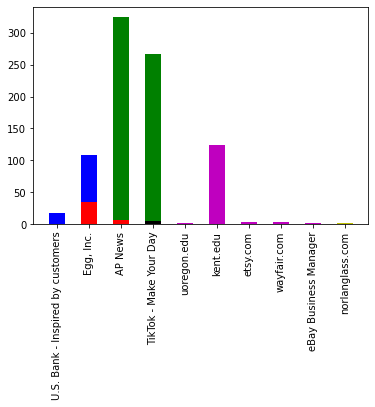

In [98]:

plt.bar(appbyevent['App'][0:10], appbyevent['Activate App'][0:10], color = 'b', width = .50)
plt.bar(appbyevent['App'][0:10], appbyevent['Custom'][0:10], color = 'g', width = .50)
plt.bar(appbyevent['App'][0:10], appbyevent['Search'][0:10], color = 'k', width = .50)
plt.bar(appbyevent['App'][0:10], appbyevent['View Content'][0:10], color = 'y', width = .50)
plt.bar(appbyevent['App'][0:10], appbyevent['Ad Request'][0:10], color = 'r', width = .50)
plt.bar(appbyevent['App'][0:10], appbyevent['Page Views'][0:10], color = 'm', width = .50)
plt.xticks(rotation = 90)
plt.show()

## Data Visualization

The bar graph above shows how many times an app was activated (blue) an app was searched (black) an app was viewed (yellow) a page was viewed (magenta) and that a custom event happened (green). The red bar represent the ammount of ads that were requested for those apps.

## Conclusions

My hypothesis about the corrilation between events and advertisements were incorrect. Based on the bar graph, large amounts of custom events seems to have little to no effect on ad requests at all. It does seem that there is a corrilation between activated apps and ad requests though. I think there is a lot more context when it comes to advertisement rather then just events = advertisements. Like the kent.edu website was viewed quite a bit but resulted in no advertisment requests, probably becuase that website wasn't selling a product that needs mass advertisement on facebook. My conclusion is that there is a combination of other factors alone with visits to websites that control the kinds of advertisements the user gets on facebook.

## Limitations, Alternitive Approaches, and Next Steps

One limitation I noticed when doing this assignment was not using my own facebook data. I have never had a facebook, so I feel I missed out on being able to make personal hypothesis or being able to understand the data by knowing how I use the app. I also feel that it would be interesting to see how results change if the data pool was bigger and or organised from most to least used outside apps. One question that I got while doing this assignment is what exactly is a custom event? To understand this topic better, I am going to ask my family members for their facebook data so I can work with a broader dataset with more advertisemnt information. Also becasue I would know the person who owns the account well, I could make better assumptions and observations based on what I know about their personality, how they use the internet and the products they like.